# See the raw data

In [68]:
from matplotlib import pyplot as plt
import numpy as np
import os
from PIL import Image

In [69]:
data_path = os.path.join('..', 'input', 'train')
objects_name = ['bed', 'chair', 'sofa', 'swivelchair', 'table']
img_per_class = 4

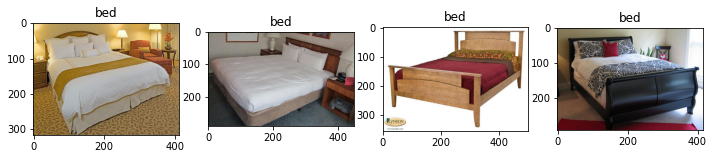

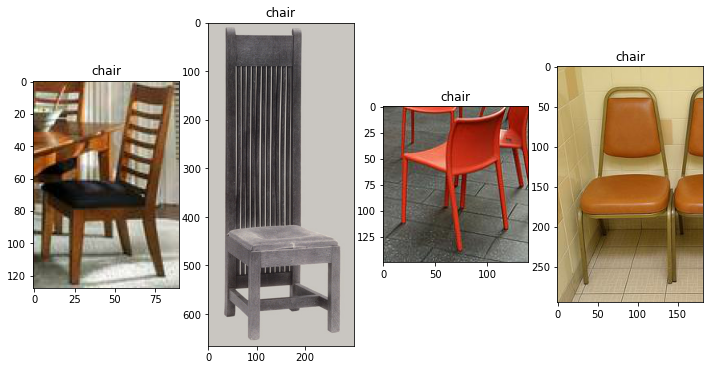

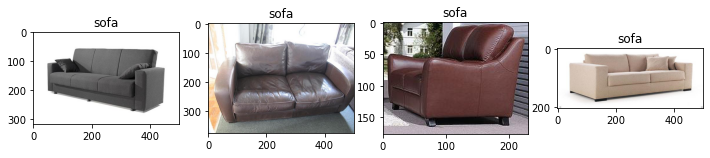

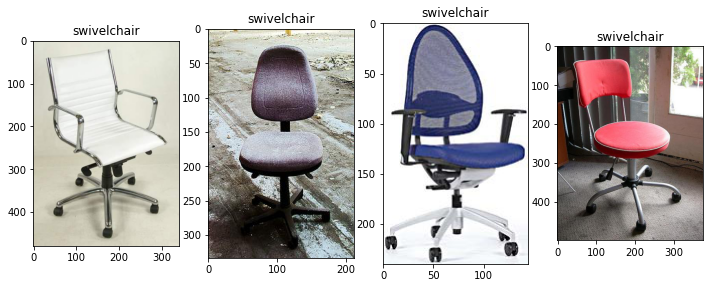

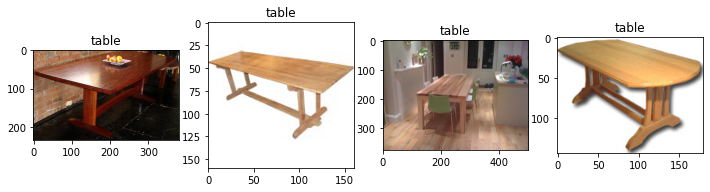

In [4]:
# Show 4 images per class randomly
for i, obj_name in enumerate(objects_name):
    plt.figure(figsize=(12,12))
    for j in range(img_per_class):
        plt.subplot(1, img_per_class, j+1)
        images = os.listdir(os.path.join(data_path, objects_name[i]))
        img_path = os.path.join(data_path, objects_name[i], images[np.random.randint(len(images))])
        img = Image.open(img_path)
        plt.title(objects_name[i])
        plt.imshow(np.array(img))
    plt.show()

# see the data after the augmentation

In [1]:
# in order to import files from src package, execute this code
import sys
from __init__ import get_parent_path
parentPath = get_parent_path()
if not parentPath in sys.path:
    sys.path.insert(1, get_parent_path())

In [2]:
from src.getData import import_data

In [3]:
trainData = import_data('train')

Found 4024 images belonging to 5 classes.


In [84]:
# decode label
def get_key(classesDict):
    keys = list(classesDict.keys())
    values = list(classesDict.values())
    def f(value):
        return keys[values.index(value)]
    return f

decode_key = get_key(trainData.class_indices)

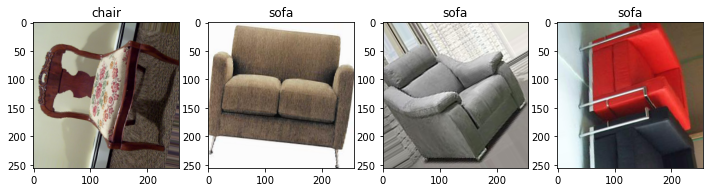

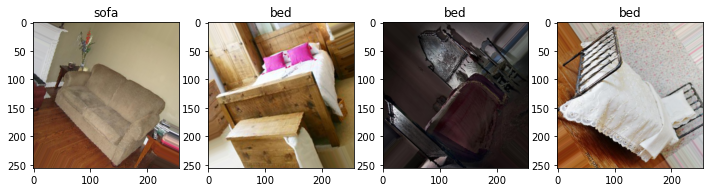

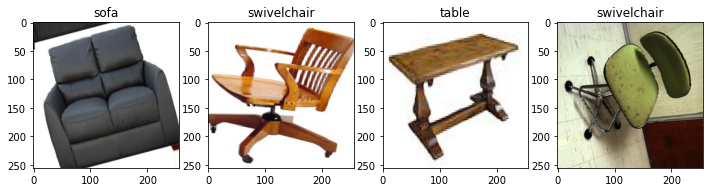

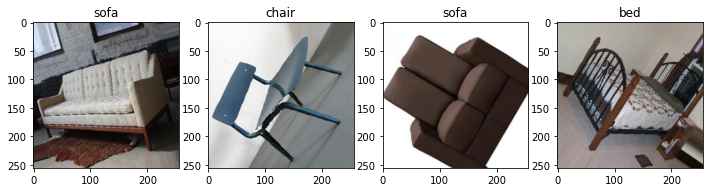

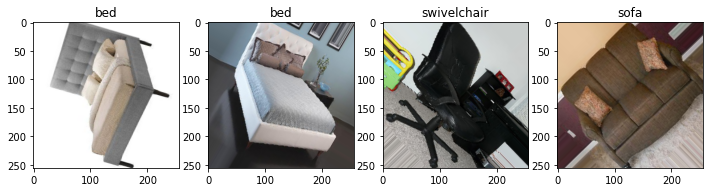

In [90]:
import matplotlib.pyplot as plt
for i in range(len(objects_name)):
    plt.figure(figsize=(12,12))
    for j in range(img_per_class):
        plt.subplot(1, img_per_class, j+1)
        randi, randj = np.random.randint(len(trainData)), np.random.randint(len(trainData[0][0]))
        plt.title(decode_key(trainData[randi][1][randj]))
        plt.imshow(trainData[randi][0][randj])

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

In [2]:
model = load_model('../src/model.h5')

In [5]:
plot_model(model, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
